Programming requests: 
- Instead of repeating code use **def function**, **for loop**, **while loop**
- Titles on graphs
- explain what you are doing, needs a conclusion ie Introduction, Explainations, Conclusions

## Compare the number of imported and exported cattle from Ireland and France
### A data science approach to investigation into import and export of cattle from Ireland and France using data from [FAOSTAT](https://www.fao.org/faostat/en/#data/TCL)
#### Naomi Tunstead - sba22222
#### MSc in Data Analytics
#### MSC_DA_CA2

In [7]:
# Read in libraries needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Import the data
df = pd.read_csv('FAOSTAT_export_import_data.csv')

In [9]:
# High level overview of the dataset
df.sample(10)

Domain Code                        Domain  Area Code (M49)         Area  \
245          TCL  Crops and livestock products              250       France   
539          TCL  Crops and livestock products              372      Ireland   
841          TCL  Crops and livestock products              380        Italy   
629          TCL  Crops and livestock products              372      Ireland   
903          TCL  Crops and livestock products              380        Italy   
12           TCL  Crops and livestock products              250       France   
264          TCL  Crops and livestock products              276      Germany   
305          TCL  Crops and livestock products              276      Germany   
1236         TCL  Crops and livestock products              528  Netherlands   
179          TCL  Crops and livestock products              250       France   

      Element Code          Element  Item Code (CPC)    Item  Year Code  Year  \
245           5922     Export Value             2111  Cattle       2012  2012   
539           5608  Import Quantity             2111  Cattle       1992  1992   
841           5622     Import Value             2111  Cattle       1973  1973   
629           5622     Import Value             2111  Cattle       2015  2015   
903           5908  Export Quantity             2111  Cattle       1975  1975   
12            5608  Import Quantity             2111  Cattle       1973  1973   
264           5608  Import Quantity             2111  Cattle       1971  1971   
305           5608  Import Quantity             2111  Cattle       2012  2012   
1236          5922     Export Value             2111  Cattle       1987  1987   
179           5908  Export Quantity             2111  Cattle       2013  2013   

          Unit    Value Flag Flag Description  
245   1000 US$  1833627    A  Official figure  
539       Head     9325    A  Official figure  
841   1000 US$   853248    A  Official figure  
629   1000 US$     1021    A  Official figure  
903       Head      789    A  Official figure  
12        Head    48998    A  Official figure  
264       Head   162098    A  Official figure  
305       Head   102908    A  Official figure  
1236  1000 US$   112693    A  Official figure  
179       Head  1309566    A  Official figure

This is just a high level overview of the dataset. Are first glance we can see here that there are a number of columns not needed. We know this because the columns contain the same input for every row which doesn't add much value to our analysis. ie ``Domain Code``, ``Domain``, ``Item Code (CPC)``, ``Item``, ``Flag`` and ``Flag Descriptioin``. Other columns that don't seem to be very informative are ``Area Code (M49)``, ``Element Code`` and ``Year Code``. We will drop these during our data cleaning phase but for now we are just exploring the data to try and get a sense of the dataframe we are dealing with.

In [10]:
# Check the datatypes for each column and determine if they are correct or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Domain Code       1270 non-null   object
 1   Domain            1270 non-null   object
 2   Area Code (M49)   1270 non-null   int64 
 3   Area              1270 non-null   object
 4   Element Code      1270 non-null   int64 
 5   Element           1270 non-null   object
 6   Item Code (CPC)   1270 non-null   int64 
 7   Item              1270 non-null   object
 8   Year Code         1270 non-null   int64 
 9   Year              1270 non-null   int64 
 10  Unit              1270 non-null   object
 11  Value             1270 non-null   int64 
 12  Flag              1270 non-null   object
 13  Flag Description  1270 non-null   object
dtypes: int64(6), object(8)
memory usage: 139.0+ KB


The ``df.info()`` command tells us not only the name of each column but also the data type it is. Looking down the list of columns they all seem to have the correct data type for the data contained in the column. Another important reason for using this command is to check and see if there are any missing values. It is clear that there are no missing values or ``non-null``values.

In [9]:
#Only keep the columns we want to use
df = df.iloc[:, [3,5,9,10,11]]

In [12]:
df

Area          Element  Year      Unit   Value
0          France  Import Quantity  1961      Head   11500
1          France  Import Quantity  1962      Head   30800
2          France  Import Quantity  1963      Head   35800
3          France  Import Quantity  1964      Head   18700
4          France  Import Quantity  1965      Head    6500
...           ...              ...   ...       ...     ...
1265  Netherlands     Export Value  2016  1000 US$  251444
1266  Netherlands     Export Value  2017  1000 US$  430648
1267  Netherlands     Export Value  2018  1000 US$  426001
1268  Netherlands     Export Value  2019  1000 US$  311846
1269  Netherlands     Export Value  2020  1000 US$  257454

[1270 rows x 5 columns]

In [13]:
#Check 
df.nunique()

Area          5
Element       4
Year         60
Unit          3
Value      1261
dtype: int64

In [14]:
df['Unit'].unique()

array(['Head', 'tonnes', '1000 US$'], dtype=object)

I used ``df.nunique`` to display the number of unique values in each column. Using this and ``df.info()`` we can see that ``Area`` , ``Element`` and ``Value`` contains discrete categorial variables. ``Year`` contains discrete numerical variables and ``Value`` contains continueous numerical variables. Since ``Value`` is our target variable we will be using regression models later on for our predictions. 

In [15]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

Year      Value
count 1270.00    1270.00
mean  1991.96  374733.01
std     17.90  518931.35
min   1961.00       2.00
25%   1976.00   39624.75
50%   1992.00  140306.00
75%   2008.00  456175.50
max   2020.00 2613962.00

The ``df.describe()`` function is a useful tool for generating summary statistics for numeric columns in a ``pandas`` DataFrame. It calculates a set of statistics that describe the distribution and central tendency of the data in each column. Above we can see the count of non-missing values, the mean, the standard deviation, the minimum and maximum values, and the 25th, 50th, and 75th percentiles. 

Looking at the table above the import statistics to take note of are the ``mean`` and the ``median``. For the ``Year`` variable we can see both the ``mean`` and the ``median`` are equal. Therefore, the data in the ``Year`` column is symmetrical as expected. However, for the ``Value`` variable the ``mean`` is 374,733.01 and the ``median`` is 140,306.00, which are not equal. Therefore, the data is skewed in the direction of the mean. This is important to note as this will impact the statistical inference, we will carry out later on. 

The range of the data in each variable is also an important statistic. For the ``Year`` variable we see it has a range of 59 years which is a relatively small range. For the variable ``Value`` we have a very large range of 2,613,960. This tells us the ``mean`` may be heavily influenced by outliers or extreme values, which could make it less representative of the data as a whole. Therefore, from now on we may need to use the median value for our measure of central tendency.  

The standard deviation is a measure of the dispersion or spread of a dataset. It is calculated as the square root of the variance, which is the average of the squared differences between the values and the mean. Here we can see for the ``Year`` variable standard deviation of 17.90 is small indicating that the values are more concentrated around the mean. However, for the ``Value`` variable it is significantly higher at 518,931.35 indicating that the values are more spread out. It's worth noting that the standard deviation is sensitive to outliers, or values that are significantly larger or smaller than the rest of the data. If there are outliers in the dataset, the standard deviation may be artificially inflated and may not accurately reflect the dispersion of the data. In such cases, other measures of dispersion, such as the interquartile range, may be more appropriate. 

The interquartile range (IQR) is a measure of dispersion or spread in a dataset. It is calculated as the difference between the 75th percentile and the 25th percentile, and is a robust measure that is less sensitive to outliers than the range or standard deviation. The IQR tells you the range of the middle 50% of the values in a dataset. For the ``Year`` variable the IQR is 32 this is small meaning the middle 50% of the values are concentrated around the median, indicating that the data is more homogeneous. The ``Value`` variable has an IQR of 416550.75 indicating that there is a significant amount of variability in the data. 

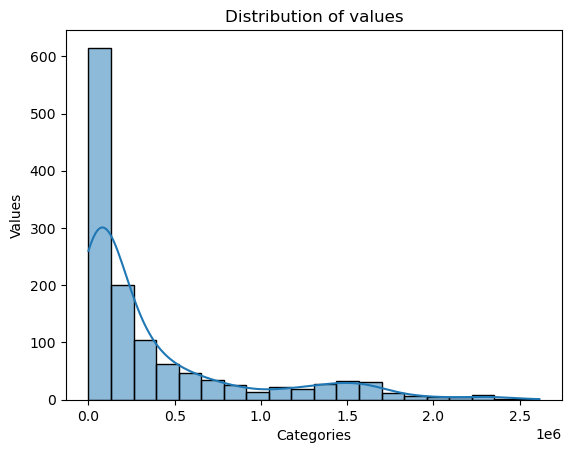

In [16]:
sns.histplot(data = df, x = 'Value', bins = 20, kde = True)
plt.title('Distribution of values')
plt.xlabel('Categories')
plt.ylabel('Values');

C:\Users\naomi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\naomi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\naomi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\naomi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


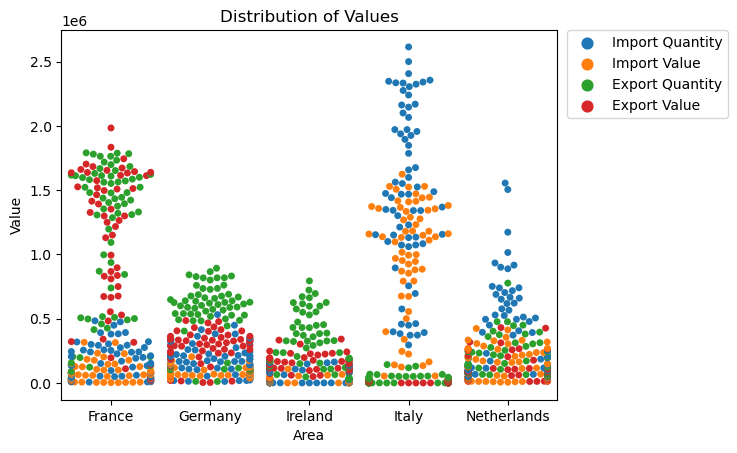

In [17]:
plt.title('Distribution of Values')
sns.swarmplot(data = df, x=df['Area'], y=df['Value'], hue = 'Element')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

In [18]:
# # Reshape the data using pivot_table
# df_pivoted = df.pivot_table(index="Area", columns=["Year", "Element"], values="Value")

# # Rename the columns
# df_pivoted.columns = ["Import Quantity", "Export Quantity", "Import Value", "Export Value"]

# # Move the area column from the index to a regular column
# df_pivoted = df_pivoted.reset_index()

# # View the reshaped data
# print(df_pivoted)

In [10]:
# Drop the unit column
df = df.drop('Unit', axis = 1)

In [20]:
df

Area          Element  Year   Value
0          France  Import Quantity  1961   11500
1          France  Import Quantity  1962   30800
2          France  Import Quantity  1963   35800
3          France  Import Quantity  1964   18700
4          France  Import Quantity  1965    6500
...           ...              ...   ...     ...
1265  Netherlands     Export Value  2016  251444
1266  Netherlands     Export Value  2017  430648
1267  Netherlands     Export Value  2018  426001
1268  Netherlands     Export Value  2019  311846
1269  Netherlands     Export Value  2020  257454

[1270 rows x 4 columns]

In [21]:
# Group the data by year and element
grouped = df.groupby(['Year', 'Element'])

# Define a function that sums up the values for each group
def sum_values(group):
    result = {
        'Year': group['Year'].iloc[0],
        'Element': group['Element'].iloc[0]
    }
    if 'Import' in group['Element'].iloc[0]:
        result['Import Value'] = group['Value'].sum()
        result['Import Country'] = group['Area'].iloc[0]
    else:
        result['Export Value'] = group['Value'].sum()
        result['Export Country'] = group['Area'].iloc[0]
    return result

# Apply the function to each group
results = [sum_values(group) for _, group in grouped]

# Convert the list of dictionaries into a DataFrame
result_df = pd.DataFrame.from_records(results)

# Reorder the columns to match the desired output
result_df = result_df[['Year', 'Import Quantity', 'Export Quantity', 'Import Country', 'Export Country', 'Import Value', 'Export Value']]

# Fill in any missing values with NaN
result_df = result_df.fillna(value=pd.np.nan)

# Display the resulting DataFrame
print(result_df)

KeyError: "['Import Quantity', 'Export Quantity'] not in index"

In [ ]:
# Group the data by year and element
grouped = df.groupby(['Year', 'Element'])

# Define a function that sums up the values for each group
def sum_values(group):
    result = {
        'Year': group['Year'].iloc[0],
    }
    if 'Import Quantity' in group['Element'].iloc[0]:
        result['Import Quantity'] = group['Value'].sum()
        result['Import Country'] = group['Area'].iloc[0]
        
    if 'Import Value' in group['Element'].iloc[0]:
        result['Import Value'] = group['Value'].sum()
        result['Import Country'] = group['Area'].iloc[0]
        
    if 'Export Quantity' in group['Element'].iloc[0]:
        result['Export Quantity'] = group['Value'].sum()
        result['Export Country'] = group['Area'].iloc[0]
        
    else:
        result['Export Value'] = group['Value'].sum()
        result['Export Country'] = group['Area'].iloc[0]
    return result

# Apply the function to each group
results = [sum_values(group) for _, group in grouped]

# Convert the list of dictionaries into a DataFrame
result_df = pd.DataFrame.from_records(results)

# Reorder the columns to match the desired output
result_df = result_df[['Year', 'Import Quantity', 'Export Quantity', 'Import Country', 'Export Country', 'Import Value', 'Export Value']]

# Fill in any missing values with NaN
result_df = result_df.fillna(value=pd.np.nan)

# Display the resulting DataFrame
result_df

In [ ]:
# Group the data by year
grouped = df.groupby(['Year'])

# Define a function that sums up the values for each group
def sum_values(group):
    result = {
        'Year': group['Year'].iloc[0]
    }
    import_df = group[group['Element'].str.contains('Import')]
    export_df = group[group['Element'].str.contains('Export')]
    result['Import Quantity'] = import_df['Value'].sum()
    result['Import Country'] = import_df['Area'].iloc[0]
    result['Import Value'] = import_df['Value'].sum()
    result['Export Quantity'] = export_df['Value'].sum()
    result['Export Country'] = export_df['Area'].iloc[0]
    result['Export Value'] = export_df['Value'].sum()
    return result

# Apply the function to each group
results = [sum_values(group) for _, group in grouped]

# Convert the list of dictionaries into a DataFrame
result_df = pd.DataFrame.from_records(results)

# Reorder the columns to match the desired output
result_df = result_df[['Year', 'Import Quantity', 'Export Quantity', 'Import Country', 'Export Country', 'Import Value', 'Export Value']]

# Fill in any missing values with NaN
result_df = result_df.fillna(value=pd.np.nan)

# Display the resulting DataFrame
result_df

TypeError: '<' not supported between instances of 'int' and 'str'

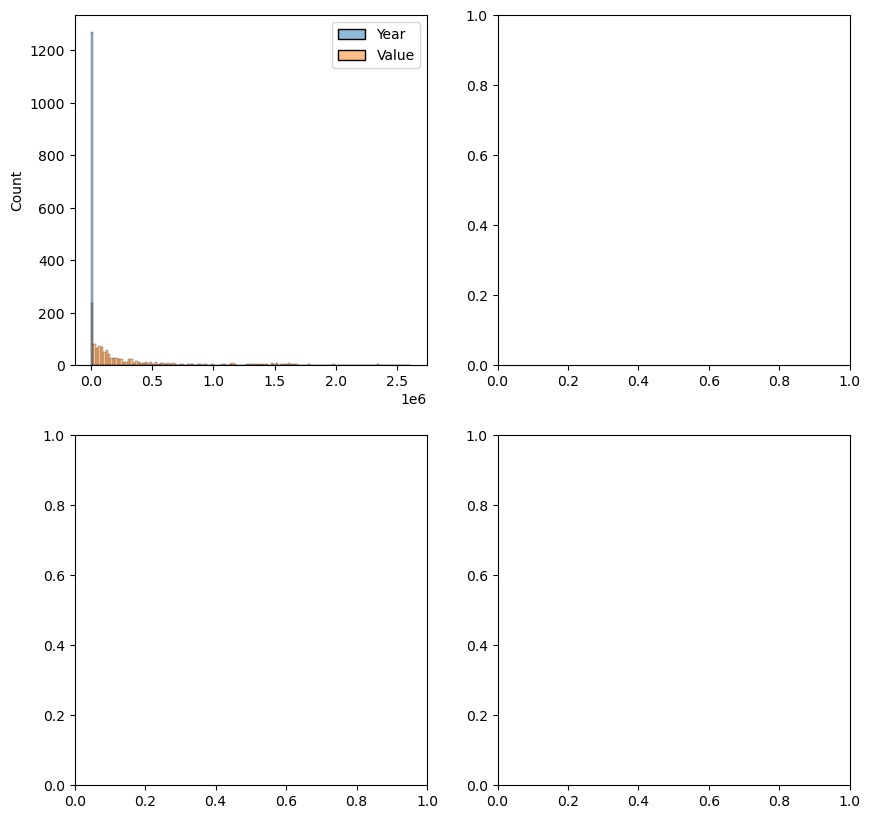

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import probplot


# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Histogram
sns.histplot(df, ax=axs[0, 0])

# Q-Q plot
probplot(df, plot=plt)

# Boxplot
sns.boxplot(df, ax=axs[1, 0])

# Density plot
sns.kdeplot(df, ax=axs[1, 1])

# Show the plot
plt.show()

In [14]:
# Convert string values to numerical values
for i in range(len(df)):
    if isinstance(df[i], str):
        try:
            df[i] = int(df[i])
        except ValueError:
            try:
                df[i] = float(df[i])
            except ValueError:
                df[i] = np.nan

# Remove any remaining NaN values
df = df[~np.isnan(df)]

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Histogram
sns.histplot(df, ax=axs[0, 0])

# Q-Q plot
probplot(df, plot=plt)

# Boxplot
sns.boxplot(df, ax=axs[1, 0])

# Density plot
sns.kdeplot(df, ax=axs[1, 1])

# Show the plot
plt.show()

KeyError: 0